In [1]:
import rasterio
import PIL
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import cv2 as cv
import rasterio

In [2]:
with rasterio.open('red.TIF') as src:
    red = src.read(1, out_shape=(1, int(src.height), int(src.width)))

with rasterio.open('green.TIF') as src:
    green = src.read(1, out_shape=(1, int(src.height), int(src.width)))
    
with rasterio.open('blue.TIF') as src:
    blue = src.read(1, out_shape=(1, int(src.height), int(src.width)))

In [3]:
RGB = np.zeros([src.height, src.width, 3], dtype = np.uint8)

In [4]:

RGB[:,:,0] = np.uint8(256*(red/65536))
RGB[:,:,1] = np.uint8(256*(green/65536))
RGB[:,:,2] = np.uint8(256*(blue/65536))

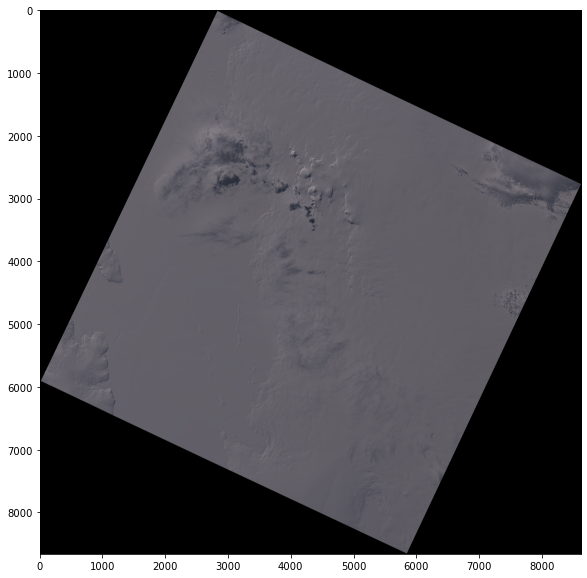

In [5]:
fig = plt.figure(figsize=(10,10))
plt.imshow(RGB)

In [6]:
img = PIL.Image.fromarray(RGB)

In [7]:
HSV_img = cv.cvtColor(np.uint8(img), cv.COLOR_RGB2HSV)

In [8]:
value_channel = HSV_img[:,:,2] * 9
HSV_img[:,:,2]=value_channel
back_to_RGB = cv.cvtColor(HSV_img, cv.COLOR_HSV2RGB)
value_channel

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

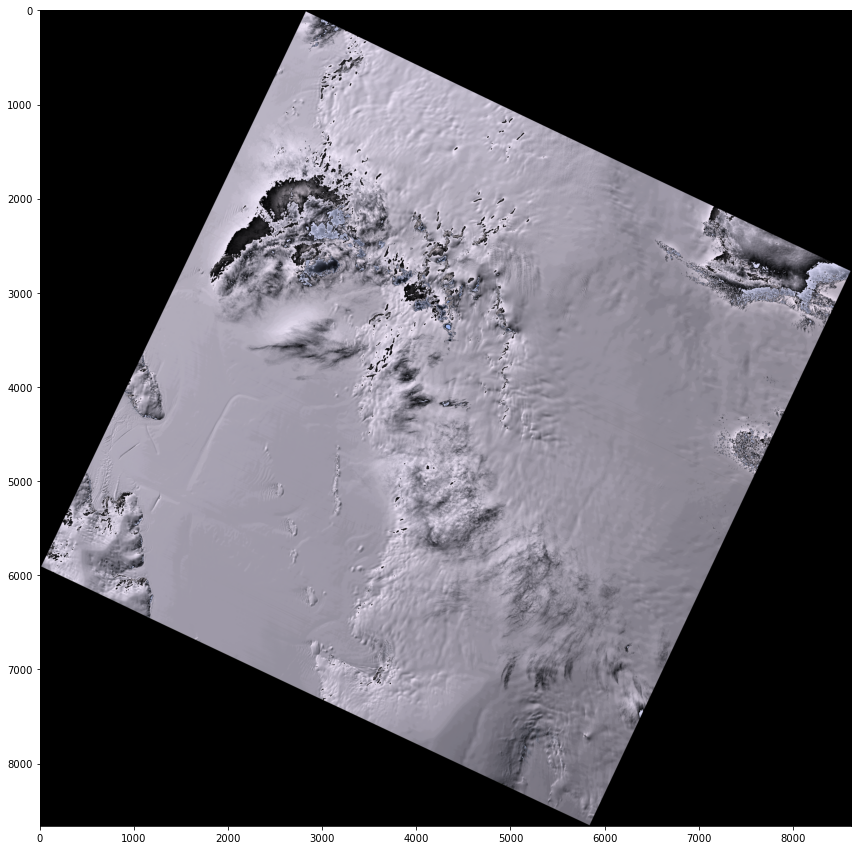

In [11]:
fig = plt.figure(figsize=(15,15))
plt.imshow(back_to_RGB)